In [3]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''
#If dataset is in google drive, it can be imported from there as well 
from google.colab import drive
drive.mount('/content/drive') 

# Define directories for training and validation data
train_dir = '/content/drive/MyDrive/AQI_Estimator/Training'
validation_dir = '/content/drive/MyDrive/AQI_Estimator/Validation'
'''

train_dir= '/AQI_Estimator_Dataset/Training'
validation_dir = '/AQI_Estimator_Dataset/Validation'


Mounted at /content/drive


In [4]:
# Define data generators with image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Define batch size and image size
batch_size = 32
img_size = (224, 224)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=img_size,
                                                              batch_size=batch_size,
                                                              class_mode='binary')

Found 243 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [44]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,

                    steps_per_epoch=train_generator.n//batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//batch_size)

Epoch 1/20
7/7 [==============================] - 47s 7s/step - loss: 0.9537 - accuracy: 0.4597 - val_loss: 0.6913 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 44s 6s/step - loss: 0.6776 - accuracy: 0.5924 - val_loss: 0.7121 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 44s 6s/step - loss: 0.6880 - accuracy: 0.5687 - val_loss: 0.6795 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 45s 6s/step - loss: 0.6241 - accuracy: 0.6967 - val_loss: 0.9100 - val_accuracy: 0.5312
Epoch 5/20
7/7 [==============================] - 45s 7s/step - loss: 0.6300 - accuracy: 0.6872 - val_loss: 0.5401 - val_accuracy: 0.6250
Epoch 6/20
7/7 [==============================] - 47s 7s/step - loss: 0.5883 - accuracy: 0.7009 - val_loss: 0.5495 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 49s 7s/step - loss: 0.5425 - accuracy: 0.7441 - val_loss: 0.4891 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==================

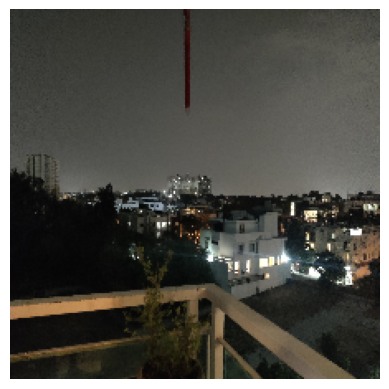

1/1 [==============================] - 0s 59ms/step
Estimated AQI:  [148.36021]
The air in the image is moderately polluted


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the new image
img_path = '/Sample_Images/Image_4.jpg'
img = image.load_img(img_path, target_size=img_size)
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the model
prediction = model.predict(x)

# Print the predicted class (0 for clean air, 1 for polluted air)
aqi=prediction[0]*500
print("Estimated AQI: ",aqi)
if aqi<=50:
  print("The air in the image is clean")
if aqi>50 and aqi<=100:
    print("The air in the image is satisfactory")
if aqi>100 and aqi<=200:
  print("The air in the image is moderately polluted")
if aqi>200 and aqi<=300:
  print("The air in the image is poor")
if aqi>300 and aqi<=400:
  print("The air in the image is heavily polluted")
if aqi>400:
  print("The air in the image is severely polluted")